# Open Food Facts Exploratory analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn

In [3]:
food = pd.read_csv('data/data.csv', sep = '\t', low_memory= False)

There are a lot of NaNs in a dataset:

Text(0.5,1,'Proportion of NaNs of each column')

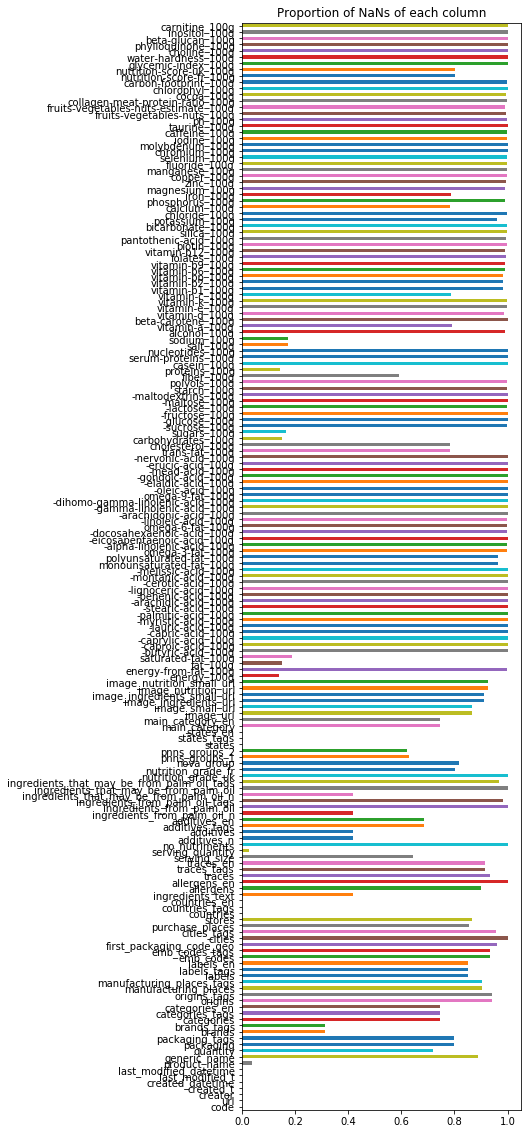

In [111]:
plt.figure(figsize=(5, 20))
food.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs of each column")

### First idea
We are very curious in "Food carbon footprint": greenhouse gas emissions produced by growing, rearing, farming, processing, transporting, storing, cooking and disposing of the food we eat. We are interested in finding out the countries, which are emitting huge amount of carbon in the result of food production and consumption, and identify the ways to reduce it. WE hope the dataset will give us insights about the products and their origins having highest carbon footprint(i.e. meat, cheese,eggs, so on) and the ones having lower carbon footprints(i.e. fruit, vegetables, beans, nuts so on). Additionally we consider that food packaging and food waste treatment have huge proportion of impact on carbon emission, thus these were hypothesis that we were interested to test and make conclusions about global problems.

In [ ]:
# to separat the data where the carbon footprint  column has no missing values
data_with_carbon = food[~food['carbon-footprint_100g'].isnull()]
print('The number of foods containing carbon inforamtion: {} which is the {} % of data'.format(data_with_carbon.shape[0],data_with_carbon.shape[0]/food.shape[0] ))

/Users/mariamhakobyan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


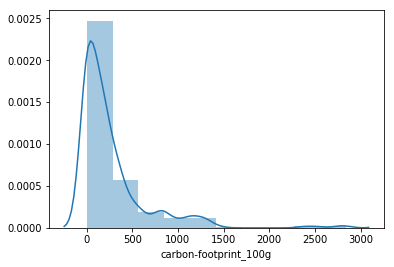

In [104]:
# see its estimated distribution
sns.distplot(data_with_carbon["carbon-footprint_100g"], bins= 10)

In [18]:
# get numeric features
numeric_features = data_with_carbon.describe().columns

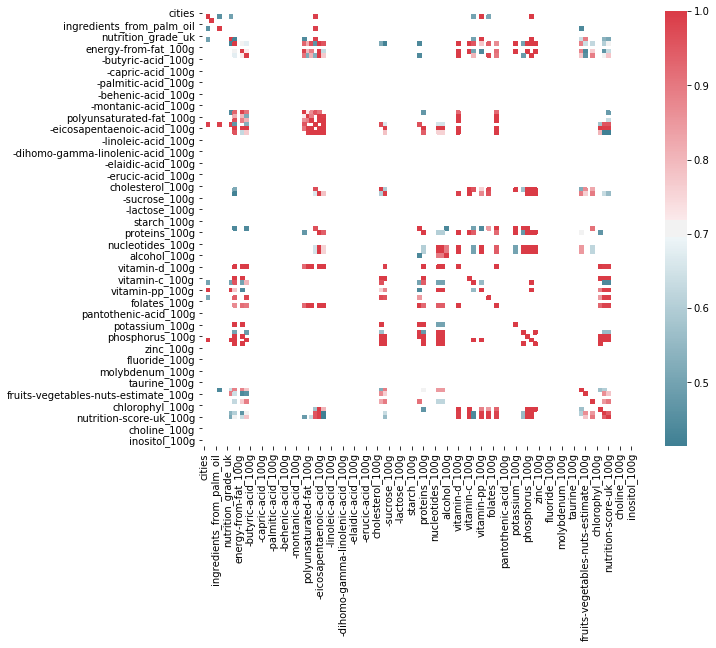

In [118]:
# print the correlation table for the small data with carbon footprint 
f, ax = plt.subplots(figsize=(10, 8))
corr = data_with_carbon[numeric_features].corr().abs()
corr = corr[corr > 0.4]
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [121]:
# get the highest correlated feautres
corr_carbon = corr["carbon-footprint_100g"]
a = corr_carbon[corr_carbon > 0.5] 
print("The highest correlation with carbon-footprint")
a

The highest correlation with carbon-footprint


-alpha-linolenic-acid_100g     0.576160
-eicosapentaenoic-acid_100g    1.000000
-docosahexaenoic-acid_100g     0.804430
vitamin-d_100g                 0.999337
vitamin-c_100g                 1.000000
vitamin-pp_100g                0.885950
vitamin-b9_100g                0.845574
vitamin-b12_100g               0.930463
phosphorus_100g                1.000000
iron_100g                      1.000000
magnesium_100g                 1.000000
fruits-vegetables-nuts_100g    0.570039
carbon-footprint_100g          1.000000
Name: carbon-footprint_100g, dtype: float64

Text(0.5,1,'Proportion of NaNs in each correlated columns with carbon Footprint in the whole dataset')

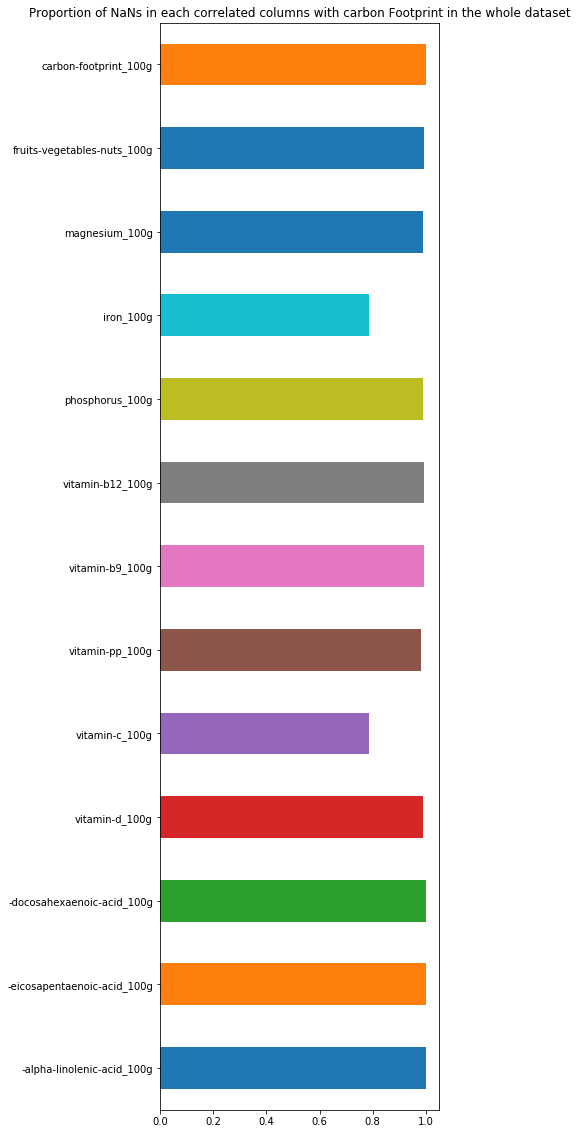

In [107]:
# see the proportion of nulls of the highly correlated features in the whole dataset
plt.figure(figsize=(5, 20))
food[a.index].isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs in each correlated columns with carbon Footprint in the whole dataset")

In [108]:
# to know how much data we have for each of the correlated feature
for i in a.index:
    print("size of data with full {} column is {}:".format(i,food[~food[i].isnull()].shape))

size of data with full -alpha-linolenic-acid_100g column is (258, 174):
size of data with full -eicosapentaenoic-acid_100g column is (78, 174):
size of data with full -docosahexaenoic-acid_100g column is (133, 174):
size of data with full vitamin-d_100g column is (7644, 174):
size of data with full vitamin-c_100g column is (141581, 174):
size of data with full vitamin-pp_100g column is (12175, 174):
size of data with full vitamin-b9_100g column is (5592, 174):
size of data with full vitamin-b12_100g column is (5766, 174):
size of data with full phosphorus_100g column is (6279, 174):
size of data with full iron_100g column is (141435, 174):
size of data with full magnesium_100g column is (6966, 174):
size of data with full fruits-vegetables-nuts_100g column is (3391, 174):
size of data with full carbon-footprint_100g column is (343, 174):


Text(0.5,1,'Proportion of NaNs in each correlated columns with carbon Footprint in where carbon is not null')

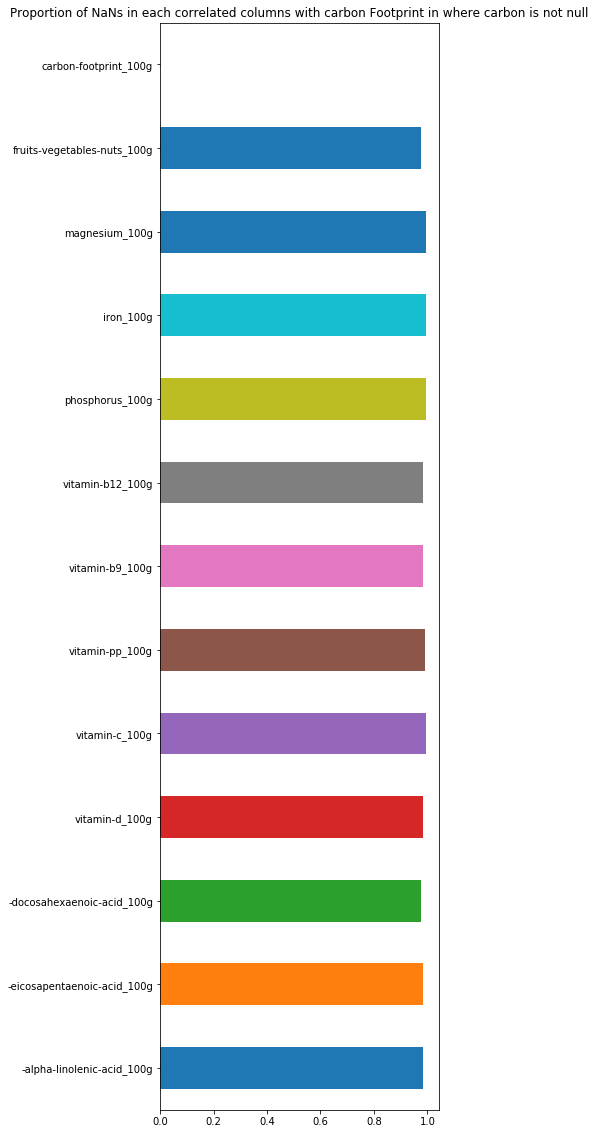

In [109]:
# to see the proportion of nulls of the features in the data_carbon_food_print
plt.figure(figsize=(5, 20))
data_with_carbon[a.index].isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs in each correlated columns with carbon Footprint in where carbon is not null")

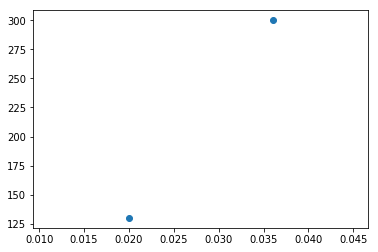

In [110]:
# get the scatter plot of c.f and vitamin-c_100g (vitamin-pp_100g, iron_100g)
plt.scatter(data_with_carbon['vitamin-c_100g'], data_with_carbon['carbon-footprint_100g'])

### Conclusion
Unfortunetly the high correlation is because of the lack of datapoints, it has been shown that the proportions of NAN is very high in the dataset where the carbon footprint has some information. So our thoughts that we may apply regression and other fill in tools to fill the carbon footprint values are ruined, we decided to leave this idea because we dont have enough data(and didn't find the carbon footprint of each food product) to make real conculsions. 

### Switch to the second idea
The second idea is "Food allergy", which happens when human body overreact to exposure to particular substances in the food. Our aim in this idea is to link a disease dataset containing information of allowed and not allowed food types of each disease with the food dataset of the ingredients and their proportions. The social goodness of this project is grouping negative and positive affecting food for each type of disease. The novelty of the project will be to identify the 'new' food(not from the already given list) allowance to special groups of people having diseases according to its composition.

In [82]:
# we separated the data where the allergens column has no missing values
data_with_allergens = food[~food['allergens'].isnull()]
print('The number of foods containing allergens inforamtion: {} '.format(data_with_allergens.shape[0]))


The number of foods containing allergens inforamtion: 66512 


In [74]:
def no_null_objects(data, columns=None):
    """
    selects rows with no NaNs
    """
    if columns is None:
        columns = data.columns
    return data[np.logical_not(np.any(data[columns].isnull().values, axis=1))]

There are a lot of text columns representing comma separated list of smth. We need a function to split rows with multiple values to several rows ([source](http://stackoverflow.com/questions/12680754/split-pandas-dataframe-string-entry-to-separate-rows))

In [76]:
def splitDataFrameList(df, target_column, separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split

    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row, row_accumulator, target_column, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

### Allergens in the dataset

In [81]:
food['allergens'].unique()

array([nan, 'OEUF, MOUTARDE, MOUTARDE',
       'BLÉ, GLUTEN, BLE, FROMAGE, LAIT, LAIT, LAIT, LACTIQUES', ...,
       'MILK, MILK, BUTTER, MILK',
       'blé, œufs, cacahuètes, arachides, beurre, noix de cajou, noix de pécan, biscuit spéculoos',
       'amandes, soja, lait, orge'], dtype=object)

In [84]:
food_allergens = splitDataFrameList(no_null_objects(food, ["allergens"]), "allergens", ",")
allergens = food_allergens["allergens"].value_counts()

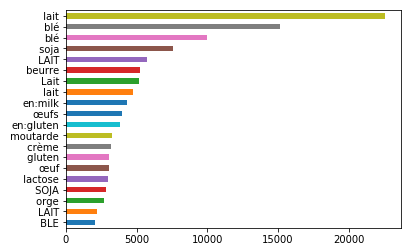

In [85]:
allergens[:20][::-1].plot.barh()

In [86]:
print(allergens[20:].index)
print("Max count:", allergens[20:].max())

Index([' BLÉ', 'en:eggs', 'soja', ' GLUTEN', ' oeufs', ' lactosérum',
       'en:soybeans', ' noisettes', ' BEURRE', ' céleri',
       ...
       ' blé tendre', 'proteină vegetală de soia', ' JOGHURT', ' Tejzsír',
       'suffite', ' lécithine', 'fr:Elimine le calcium',
       ' Hühnertrockeneiweiß', 'Pasteurized Sweet Cream', ' Schaffrischkäse'],
      dtype='object', length=5756)
Max count: 1887


### Which countries are represented in a dataset?

In [88]:
food_countries = splitDataFrameList(no_null_objects(food, ["countries"]), "countries", ",")
countries = food_countries["countries"].value_counts()

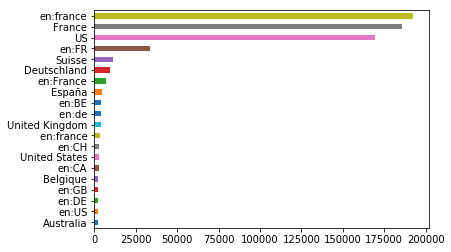

In [89]:
countries[:20][::-1].plot.barh()

There are too small number of products for other countries:

In [90]:
print(countries[20:].index)
print("Max count:", countries[20:].max())

Index(['Россия', 'en:ES', ' en:switzerland', 'Switzerland', ' en:belgium',
       'México', 'Schweiz', 'Germany', 'en:IT', 'Sverige',
       ...
       'Jordania', 'Emirats Arabes Unis', 'Fidji', 'République centrafricaine',
       ' Népal', 'en:AI', 'Hrvaška', 'en:SO', 'Écosse', 'Occitanie'],
      dtype='object', length=1082)
Max count: 1704


## Summary
* 